In [51]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import sys
import os
import time
import math

In [52]:
from bs4 import BeautifulSoup

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
pwd

'/home/mb45296/Deep Learning and NLP A_Z/1. Deep NLP Intuition/cornell movie-dialogs corpus'

In [58]:
url ="https://www.google.co.in/flights#flt=MEX.PVR.2019-05-02*PVR.MEX.2019-05-06;c:MXN;e:1;sd:1;t:f"


if os.name == "nt":
    driverPath = "/home/mb45296/WhatsApp-Chatbot/driver/chromedriver_2.24.exe"
    dataPath = "Data"
else:
    driverPath = "/home/mb45296/WhatsApp-Chatbot/driver/chromedriver"
    dataPath = "Data/ChatBot"


options = webdriver.ChromeOptions()
options.add_argument("--user-data-dir=" + dataPath)
driver = webdriver.Chrome(chrome_options=options, executable_path=driverPath)
#driver.implicitly_wait(10)
#driver = webdriver.Chrome()
driver.get(url)
driver.implicitly_wait(20)

In [30]:
"""url ="https://www.google.co.in/flights/explore/#explore;f=JFK,EWR,LGA;t=r-Europe-0x46ed8886cfadda85%253A0x72ef99e6b3fcf079;li=8;lx=12;d=2016-11-29"
driver = webdriver.PhantomJS("/home/mb45296/WhatsApp-Chatbot/driver/chromedriver_2.24.exe")
dcap = dict(DesiredCapabilities.PHANTOMJS)
dcap["phantomjs.page.settings.userAgent"] = ("Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.99 Safari/537.36")
driver = webdriver.PhantomJS(desired_capabilities=dcap,service_args=['--ignore-ssl-errors=true'])
driver.implicitly_wait(20)
driver.get(url)"""

'url ="https://www.google.co.in/flights/explore/#explore;f=JFK,EWR,LGA;t=r-Europe-0x46ed8886cfadda85%253A0x72ef99e6b3fcf079;li=8;lx=12;d=2016-11-29"\ndriver = webdriver.PhantomJS("/home/mb45296/WhatsApp-Chatbot/driver/chromedriver_2.24.exe")\ndcap = dict(DesiredCapabilities.PHANTOMJS)\ndcap["phantomjs.page.settings.userAgent"] = ("Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.99 Safari/537.36")\ndriver = webdriver.PhantomJS(desired_capabilities=dcap,service_args=[\'--ignore-ssl-errors=true\'])\ndriver.implicitly_wait(20)\ndriver.get(url)'

In [56]:
s = BeautifulSoup(driver.page_source, "lxml")

In [57]:
s

<!DOCTYPE html>
<html jstcache="0" lang="es-MX" xmlns="http://www.w3.org/1999/xhtml"><head><meta charset="utf-8"/><meta content="origin" name="referrer"/><link href="//www.gstatic.com/flights/app/travel-favicon.ico" rel="icon"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><link crossorigin="use-credentials" href="/manifest?pwa=flights" rel="manifest"/><meta content="Encuentra vuelos baratos en segundos, explora lugares de destino en un mapa y regístrate para recibir alertas de tarifas en Google Flights." name="description"/><title>Vuelos</title><script async="" nonce="2rI2/rYbtnylp5asHmWJ8g==" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.NqPOw1G8B3I.O/m=gapi_iframes,googleapis_client,plusone/rt=j/sv=1/d=1/ed=1/rs=AHpOoo9Un2bnlKyVHr37bEqQCNKVG9ZmzA/cb=gapi.loaded_0"></script><script nonce="2rI2/rYbtnylp5asHmWJ8g==">(function(){window.google={kEI:'7ze2XOK7DITN-gTW8auwCA',kEXPI:'31',authuser:0,kscs:'c9c918f0_7ze2XOK7DI

In [33]:
best_price_tags = s.findAll('div',"flt-subhead1 gws-flights-results__price gws-flights-results__cheapest-price")+s.findAll('div', 'flt-subhead1 gws-flights-results__price')
best_prices = []
for tag in best_price_tags:
    best_prices.append(int(tag.text.replace('$','').replace(',','')))

In [34]:
best_price_tags

[<div class="flt-subhead1 gws-flights-results__price gws-flights-results__cheapest-price">      $2,780   </div>,
 <div class="flt-subhead1 gws-flights-results__price gws-flights-results__cheapest-price">      $2,780   </div>,
 <div class="flt-subhead1 gws-flights-results__price gws-flights-results__cheapest-price">      $2,885   </div>,
 <div class="flt-subhead1 gws-flights-results__price gws-flights-results__cheapest-price">      $2,885   </div>,
 <div class="flt-subhead1 gws-flights-results__price">      $3,129   </div>,
 <div class="flt-subhead1 gws-flights-results__price">      $3,129   </div>,
 <div class="flt-subhead1 gws-flights-results__price">      $3,140   </div>,
 <div class="flt-subhead1 gws-flights-results__price">      $3,140   </div>,
 <div class="flt-subhead1 gws-flights-results__price">      $4,890   </div>,
 <div class="flt-subhead1 gws-flights-results__price">      $4,890   </div>,
 <div class="flt-subhead1 gws-flights-results__price">      $4,905   </div>,
 <div cla

In [16]:
best_price = best_prices[0]
best_price

2780

In [17]:
best_height_tags = s.findAll('div', "gws-flights-widgets-pricegraph-templates__down-arrow gws-flights-widgets-pricegraph-templates__visible")
best_height_tags

[]

In [18]:
fares = pd.DataFrame(sorted(set(best_prices)), columns=['price'])#.sort_values('price')
fares

,price
0,2780
1,2885
2,3129
3,3140
4,4890
5,4905
6,5543
7,5772
8,5891
9,6140


In [19]:
fares.min()

price    2780
dtype: int64

In [20]:
fares.median()

price    5224.0
dtype: float64

In [21]:
fares.describe()

,price
count,12.000000
mean,5075.250000
std,1824.661469
min,2780.000000
25%,3137.250000
50%,5224.000000
75%,5953.250000
max,8327.000000


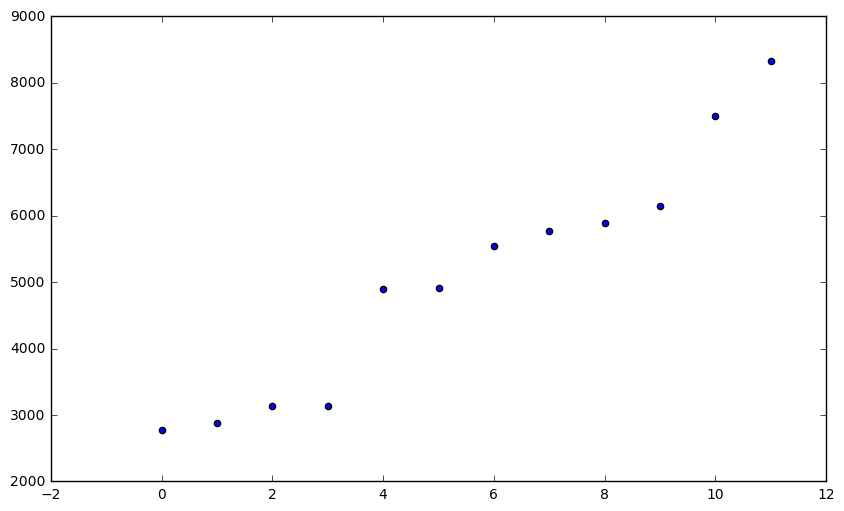

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(np.arange(len(fares['price'])),fares['price'])

In [23]:
px = [x for x in fares['price']]
ff = pd.DataFrame(px, columns=['fare']).reset_index()
ff

,index,fare
0,0,2780
1,1,2885
2,2,3129
3,3,3140
4,4,4890
5,5,4905
6,6,5543
7,7,5772
8,8,5891
9,9,6140


In [24]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [47]:
X = StandardScaler().fit_transform(ff)
db = DBSCAN(eps=.5, min_samples=1).fit(X)

/home/mb45296/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mb45296/anaconda3/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
X

array([[-1.59325501, -1.31383847],
       [-1.30357228, -1.25373476],
       [-1.01388955, -1.11406519],
       [-0.72420682, -1.10776861],
       [-0.43452409, -0.10604012],
       [-0.14484136, -0.09745387],
       [ 0.14484136,  0.26774772],
       [ 0.43452409,  0.39883105],
       [ 0.72420682,  0.46694858],
       [ 1.01388955,  0.60948024],
       [ 1.30357228,  1.3885388 ],
       [ 1.59325501,  1.86135465]])

In [27]:
X[(labels == 1)]

NameError: name 'labels' is not defined

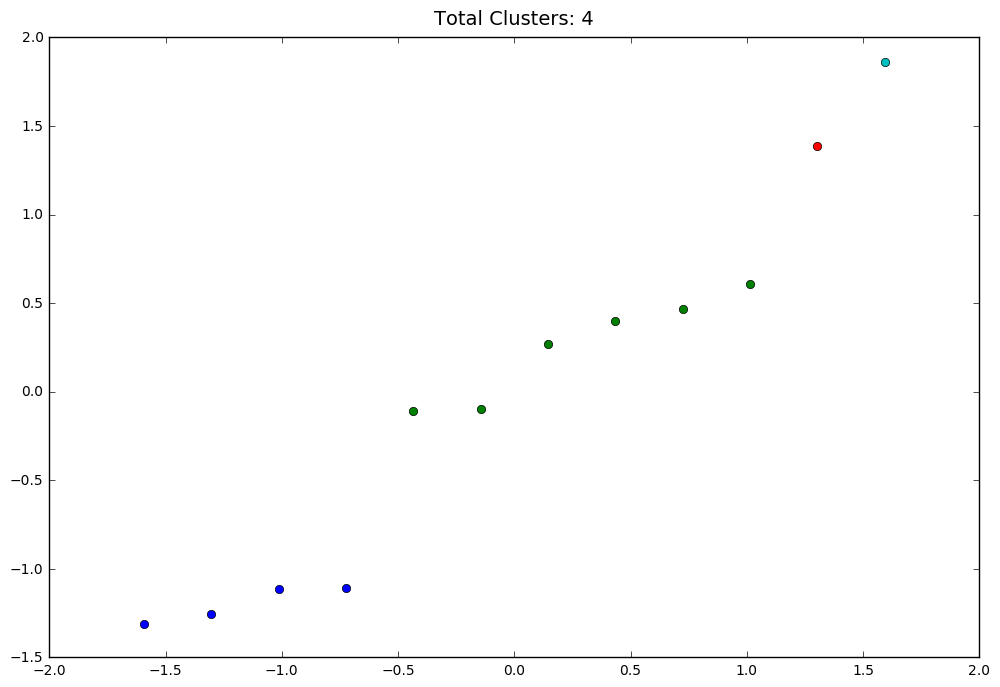

In [28]:
labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.subplots(figsize=(12,8))
for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o')#, markerfacecolor=c,markeredgecolor='k', markersize=14)
plt.title("Total Clusters: {}".format(clusters), fontsize=14,
    y=1.01)


In [76]:
px[9]

42808

In [89]:
#test_clusters(px, 1 , 10, 300)
ej=px
ej[9] = 45000
ej

[4764, 5807, 6280, 6517, 6807, 7097, 7125, 7445, 8199, 45000]

In [82]:
def test_clusters(data_series, eps_val, swap_index, swap_value):
    data_series[swap_index] = swap_value
    ff = pd.DataFrame(data_series, columns=['fare']).reset_index()
    X = StandardScaler().fit_transform(ff)
    db = DBSCAN(eps=eps_val, min_samples=1).fit(X)

    labels = db.labels_
    clusters = len(set(labels))
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0,
                            1, len(unique_labels)))

    plt.subplots(figsize=(12,8))

    for k, c in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o')#,markerfacecolor=c,markeredgecolor='k',markersize=14)

    plt.title("Total Clusters: {}".format(clusters),
              fontsize=14, y=1.01)


/home/mb45296/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mb45296/anaconda3/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


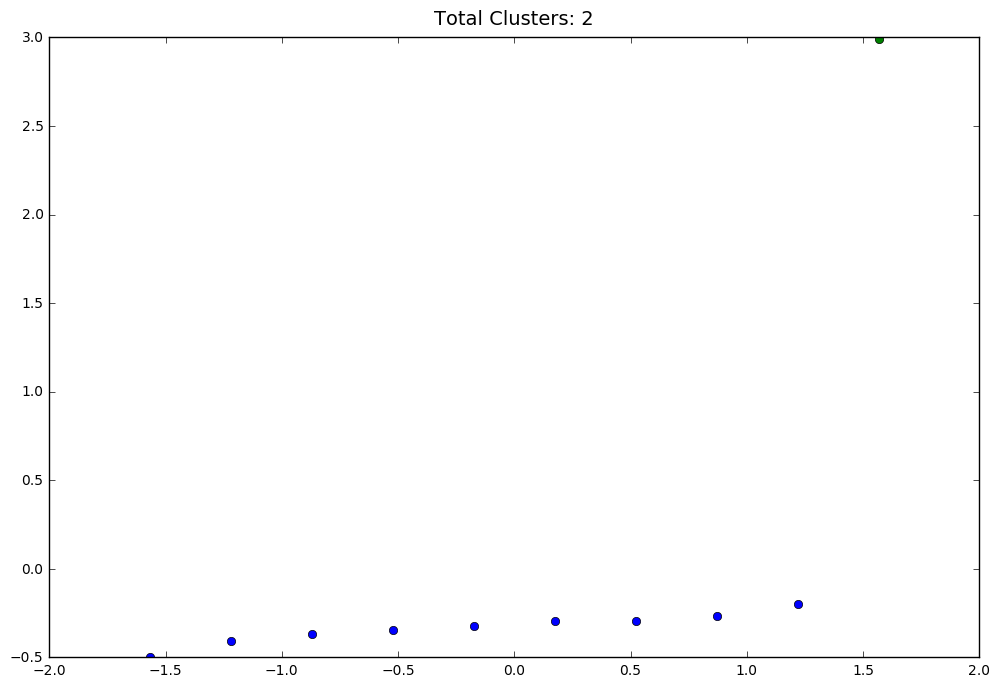

In [83]:
test_clusters(px, 0.5 , 9, 45000)

/home/mb45296/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mb45296/anaconda3/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


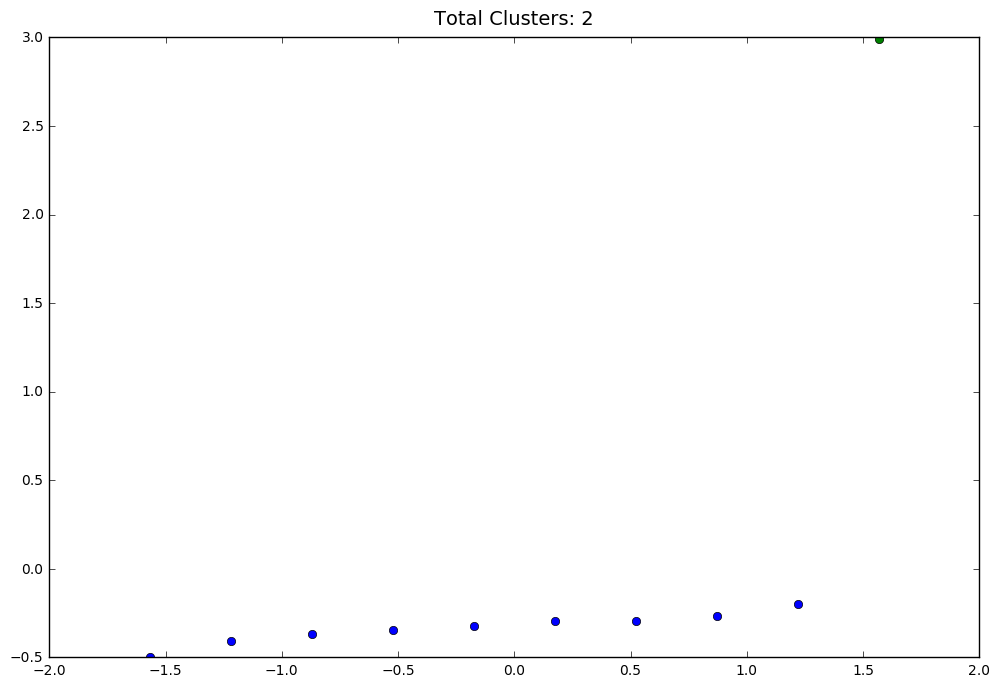

In [84]:
test_clusters(px, 1 , 9, 45000)

/home/mb45296/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mb45296/anaconda3/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


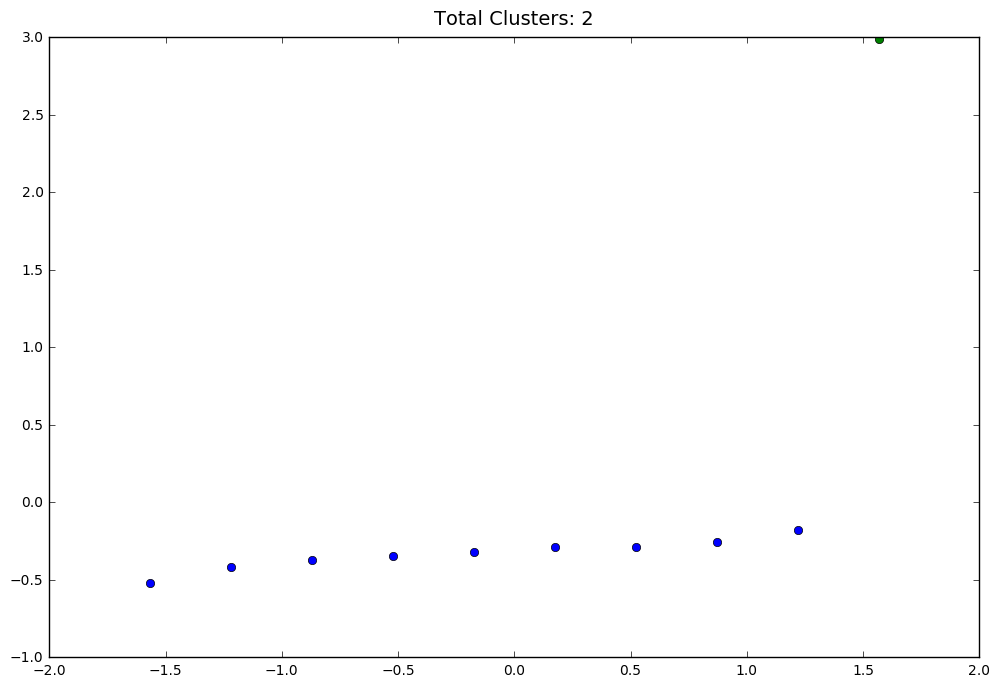

In [87]:
test_clusters(px, 1 , 9, 40000)

/home/mb45296/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mb45296/anaconda3/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


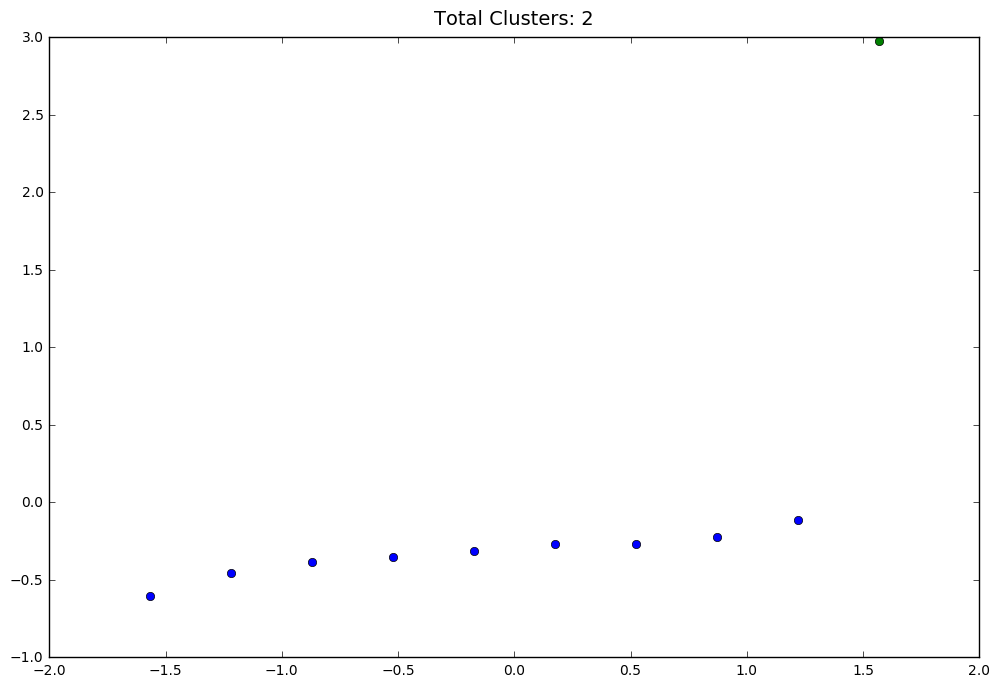

In [90]:
test_clusters(px, 1 , 9, 30000)

/home/mb45296/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mb45296/anaconda3/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


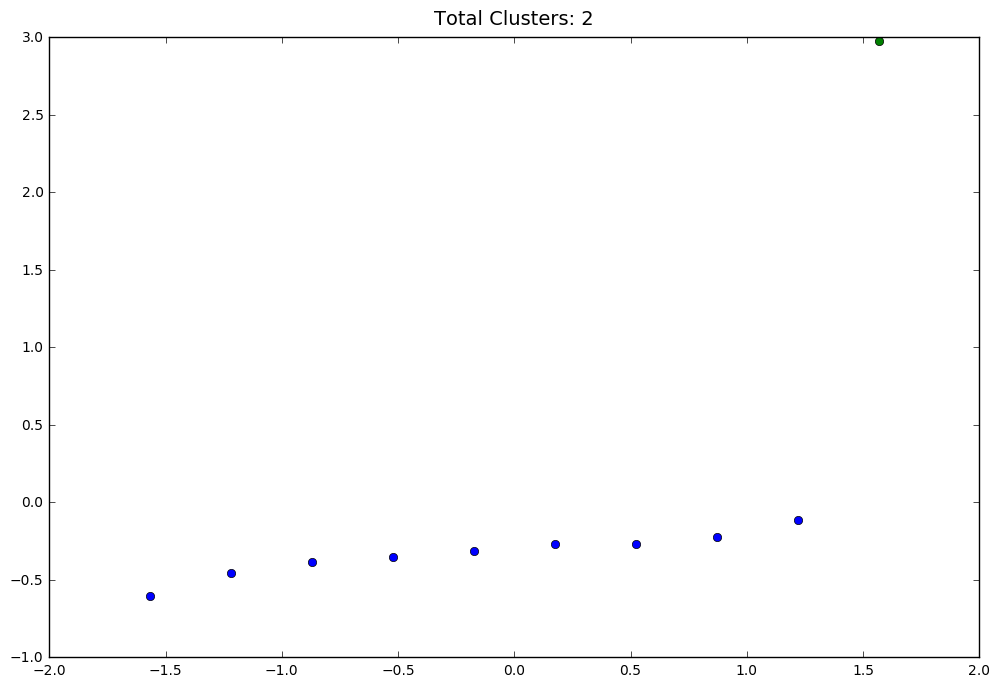

In [92]:
test_clusters(px, 1.5 , 9, 30000)

In [35]:
pf = pd.concat([ff, pd.DataFrame(db.labels_,columns=['cluster'])], axis=1)
pf


,index,fare,cluster
0,0,2780,0
1,1,2885,0
2,2,3129,0
3,3,3140,0
4,4,4890,1
5,5,4905,1
6,6,5543,1
7,7,5772,1
8,8,5891,1
9,9,6140,1


In [36]:
rf=pf.groupby('cluster')['fare'].agg(['min','count']).sort_values('min',ascending=True)
rf

,min,count
cluster,,
0,2780,4
1,4890,6
2,7501,1
3,8327,1


In [38]:
rf.iloc[0]['min']

2780

In [45]:
rf.iloc[0]['count']<rf['count'].quantile(.7)

True